In [55]:
import numpy as np
import random
import pandas as pd
from operator import add
import matplotlib.pyplot as plt

class Grid():
    def __init__(self):
        # INPUTS              1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24
        self.p_turned_on = [0.8, 0.8, 0.8, 0.8, 0.1, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8]
        
    def daily_grid_status(self):
        daily_grid_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
        return daily_grid_status

    def yearly_grid_status(self):
        yearly_grid_status = []
        for day in range(0,365):
            yearly_grid_status.append(self.daily_grid_status())
        yearly_grid_status = pd.DataFrame(yearly_grid_status)
        return yearly_grid_status

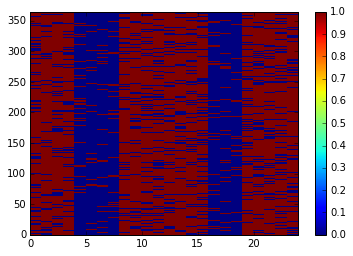

In [57]:
plt.pcolor(Grid().yearly_grid_status())
plt.colorbar()

In [5]:
def get_month_of_day_of_year(day): # for taking into account seasonal demand

    if 0 <= day <= 31: month = 0 #         January	31
    if 32 <= day <= 58: month = 1#         February	28*
    if 59 <= day <= 89: month = 2#         March	31
    if 60 <= day <= 119: month = 3#         April	30
    if 120 <= day <= 150: month = 4#         May	31
    if 151 <= day <= 180: month = 5#         June	30
    if 181 <= day <= 211: month = 6#         July	31
    if 212 <= day <= 242: month = 7#         August	31
    if 243 <= day <= 272: month = 8#         September	30
    if 273 <= day <= 303: month = 9#         October	31
    if 304 <= day <= 333: month = 10#         November	30
    if day >= 334:  month = 11#         December	31
    return month

class Mill():
    def __init__(self):
        self.size = 1
        self.average_no_of_engines = 2
        self.average_no_of_engines_stdev  =1
    
    def no_of_engines(self):
        no_of_engines = abs(np.random.normal(self.average_no_of_engines, self.average_no_of_engines_stdev,self.size))
        return int(no_of_engines)
    
    def one_mill_load_for_year(self):
        no_of_engines = self.no_of_engines()
        no_of_e,dfMill = self.Engines().engines_status_for_year_for_1_mill(no_of_engines)
        return no_of_e,dfMill
    
    class Engines():
        def __init__(self):
            # INPUTS               1,    2,   3,     4,    5,    6,   7,     8,   9,    10,   11,   12,   13,   14,   15,  16,  17,  18,   19,  20,  21,  22,  23,  24
            self.p_turned_on = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.40, 0.50, 0.60, 0.60, 0.60, 0.60, 0.60, 0.60,0.60,0.60, 0.60, 0.5, 0.50, 0.4,0.3, 0.1,0.05]
            self.season_mill_factor = [.9,.7, .9, .9,.7,.7,.4,.4,.4,.9,.9,.9]

        def daily_engine_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_mill_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_engine_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_engine_status

        def engines_status_for_year_for_1_mill(self,*args):
            if args: 
                no_of_e = args[0]
            else: 
                no_of_e = int(Mill().no_of_engines())
            multiple_engines_year_status = pd.DataFrame(np.zeros((365,24)))
            for engine in range(no_of_e):
                yearly_engine_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_engine_status.append(self.daily_engine_status(month))
                multiple_engines_year_status = multiple_engines_year_status + pd.DataFrame(yearly_engine_status)
            return no_of_e,multiple_engines_year_status

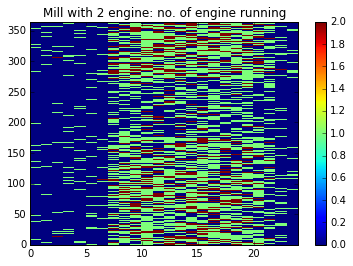

In [34]:
no_of_e, Load_Mill = Mill().one_mill_load_for_year()
%matplotlib inline
plt.pcolor(Load_Mill)
plt.title('Mill with %s engine: no. of engine running'%no_of_e)
plt.colorbar()

In [36]:
class Shop():
    def __init__(self):
        self.average_no_of_lights = 2.78260869565217
        self.average_no_of_lights_stdev = 2.10964283360371

        self.average_no_of_fan = 1.1304347826087
        self.average_no_of_fan_stdev = 1.57550418556574
        
        self.average_no_of_mobile = 1.30434782608696
        self.average_no_of_mobile_stdev = 1.39592858011809
        
        self.average_no_of_laptop = 0.0869565217391304
        self.average_no_of_laptop_stdev = 0.28810406552003
        
        self.average_no_of_fridge = 0.260869565217391
        self.average_no_of_fridge_stdev = 0.540823555863717
        
        self.size = 1

    def no_of_lights(self):
        no_of_lights = abs(np.random.normal(self.average_no_of_lights, self.average_no_of_lights_stdev,self.size))
        return int(no_of_lights)
    def no_of_fan(self):
        no_of_fan = abs(np.random.normal(self.average_no_of_fan, self.average_no_of_fan_stdev,self.size))
        return int(no_of_fan)
    def no_of_mobile(self):
        no_of_mobile = abs(np.random.normal(self.average_no_of_mobile, self.average_no_of_mobile_stdev,self.size))
        return int(no_of_mobile)
    def no_of_laptop(self):
        no_of_laptop = abs(np.random.normal(self.average_no_of_laptop, self.average_no_of_laptop_stdev,self.size))
        return int(no_of_laptop)
    def no_of_fridge(self):
        no_of_fridge = abs(np.random.normal(self.average_no_of_fridge, self.average_no_of_fridge_stdev,self.size))
        return int(no_of_fridge)

    def one_shop_load_for_year(self):
        no_of_lights = self.no_of_lights()
        no_of_fan = self.no_of_fan()
        no_of_mobile = self.no_of_mobile()
        no_of_laptop = self.no_of_laptop()
        no_of_fridge = self.no_of_fridge()
        
        n_of_l,dfLights = self.Light().lights_status_for_year_for_1_shop(no_of_lights)
        n_of_f,dfFan = self.Fan().fan_status_for_year_for_1_shop(no_of_fan)
        n_of_m,dfMobile = self.Mobile().mobile_status_for_year_for_1_shop(no_of_mobile)
        n_of_lp,dfLaptop = self.Laptop().laptop_status_for_year_for_1_shop(no_of_laptop)
        n_of_f,dfFridge = self.Fridge().fridge_status_for_year_for_1_shop(no_of_fridge)
        return n_of_l,dfLights,n_of_f,dfFan,n_of_m,dfMobile,n_of_lp,dfLaptop,n_of_f,dfFridge
    
    class Mobile():

        def __init__(self):
            # probability to turn on mobile
            self.hr_to_charge = 4 #time for charging
            average_charges_per_week = 3.0
            p_charge_per_day = average_charges_per_week/7
            waking_hour = 18
            self.p_mobile_on  = p_charge_per_day/waking_hour


        def daily_mobile_status(self):#
            daily_mobile_turned_on = np.random.binomial(1,self.p_mobile_on, 24)
            daily_mobile_status = [0 for i in range(24)]
            timestep = 0
            while timestep < 24:
                if daily_mobile_turned_on[timestep] == 1: 
                    if timestep + self.hr_to_charge < 24:
                        daily_mobile_status[timestep:timestep+ self.hr_to_charge] = [1 for i in range(timestep,timestep+ self.hr_to_charge)]
                        timestep = timestep + self.hr_to_charge 
                    else:
                        if timestep == 23:
                            daily_mobile_status[23] = 1 
                            timestep = 23
                        if timestep == 22:
                            daily_mobile_status[22:24] = [1,1]
                            timestep = 24
                        if timestep  == 21:
                            daily_mobile_status[21:24] = [1,1,1]
                            timestep = 24

                timestep += 1
            return daily_mobile_status

        def mobile_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_m = args[0]
            else: 
                no_of_m = int(Shop().no_of_mobile())
            multiple_mobiles_year_status = pd.DataFrame(np.zeros((365,24)))
            for mobile in range(no_of_m):
                year_mobile_status = []
                for day_of_year in range(0,365):    
                    year_mobile_status.append(self.daily_mobile_status())
    #             print pd.DataFrame(year_mobile_status)
                multiple_mobiles_year_status = multiple_mobiles_year_status + pd.DataFrame(year_mobile_status)
            return no_of_m,multiple_mobiles_year_status
    
    class Light():  
        def __init__(self):
            self.rating = 5
            self.size = 1
            # INPUTS              1,   2,  3,    4,   5,   6,   7, 8, 9,   10, 11,  12, 13,14,15, 16, 17, 18,   19, 20,  21,  22,  23,  24
            self.p_turned_on = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0, 0, 0, 0, 0,0.2,0.2, 0.4, 0.6, 0.8 , 0.7,0.4, 0.2,0.05]
            self.season_light_factor = [1.149,1.051,1.013,.947,.899,.876,.886,.926,.982,1.099,1.126,1.167]

        def daily_light_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_light_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_light_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_light_status
    
        def lights_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_l = args[0]
            else: 
                no_of_l = int(Shop().no_of_lights())
            multiple_lights_year_status = pd.DataFrame(np.zeros((365,24)))
            for lights in range(no_of_l):
                yearly_light_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_light_status.append(self.daily_light_status(month))
                multiple_lights_year_status = multiple_lights_year_status + pd.DataFrame(yearly_light_status)
            return no_of_l,multiple_lights_year_status
        
    class Fan():
        def __init__(self):
            # INPUTS            1,2,  3, 4, 5, 6, 7, 8, 9, 10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3 , 0.3,0.05, 0.05, 0.05]
            # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp
            # rain = np.array([6, 10, 13, 10,3,14,20,22,20,12,3,7]) # no. of days of rain in a month
            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # r = map(lambda x: -(x-rain.mean())/rain.mean(),rain)
            # plt.plot(t,color='g')
            # plt.plot(r,color='y')
            # season_fan_factor = map(add,t,r,)
            # # plt.plot(season_fan_factor,color='pink')
            # count = 0
            # print season_fan_factor
            # for n in season_fan_factor:
            #     if season_fan_factor[count] < 0 :
            #         season_fan_factor[count] = 1+n
            #     count +=1
            # season_fan_factor
            
            self.season_fan_factor = [0.090365448504983403, 0.79401993355481726, 0.67641196013289029, 0.21262458471760792, 0.99867109634551499, 0.055813953488372037, 0.40199335548172743, 0.23056478405315606, 0.35548172757475072, 0.13421926910298998, 0.7661129568106313, 0.28372093023255812]    # for one light in a Shop  
        def daily_fan_status(self,month):
            p_turned_on_season_adjusted =  map(lambda x: x*self.season_fan_factor[month],self.p_turned_on)
            count = 0
            for n in p_turned_on_season_adjusted:
                if n > 0.99: p_turned_on_season_adjusted[count] = 0.99 
                count +=1
            daily_fan_status = map(lambda x: int(np.random.binomial(1,x)),p_turned_on_season_adjusted)
            return daily_fan_status
    
        def fan_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_f = args[0]
            else: 
                no_of_f = int(Shop().no_of_fan())
            multiple_fans_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_f):
                yearly_fan_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_fan_status.append(self.daily_fan_status(month))
                multiple_fans_year_status= multiple_fans_year_status+ pd.DataFrame(yearly_fan_status)
            return no_of_f, multiple_fans_year_status
        
        
    class Laptop():
        def __init__(self):
            # INPUTS               1,    2,    3,    4,    5,    6,    7,    8,   9,  10,  11,  12,   13,  14, 15,   16,  17,  18, 19,    20,  21,  22,  23,   24
            self.p_turned_on = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.3, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5 , 0.3,0.05, 0.01, 0.01]
             
        def daily_laptop_status(self):
            daily_laptop_status = map(lambda x: int(np.random.binomial(1,x)),self.p_turned_on)
            return daily_laptop_status
    
        def laptop_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_lp = args[0]
            else: 
                no_of_lp = int(Shop().no_of_laptop())
            multiple_laptop_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_lp):
                yearly_laptop_status = []
                for day in range(0,365):
                    yearly_laptop_status.append(self.daily_laptop_status())
                multiple_laptop_year_status= multiple_laptop_year_status+ pd.DataFrame(yearly_laptop_status)
            return no_of_lp, multiple_laptop_year_status
        
    class Fridge():
        def __init__(self):
            # INPUTS        
            self.p_turned_on = 0.4 # duty cycle
            # # data from http://www.worldweatheronline.com/bahraich-weather-averages/uttar-pradesh/in.aspx
            # high = [19,19,21,27,30,29,23,24,23,29,28,25]  # temp
            # low =  [8,10,13,20,25,25,26,24,23,22,17,14] # temp

            # average = np.array(map(lambda x: x/2, map(add, high, low)))
            # t = map(lambda x: (x-average.mean())/average.mean(),average)
            # plt.plot(t,color='g')
            # season_fan_factor = t

            # count = 0
            # print season_fan_factor
            # season_fan_factor = np.array(season_fan_factor)
            # normalised = (season_fan_factor -season_fan_factor.min())/(season_fan_factor.max()-season_fan_factor.min())
            # season_fan_factor = normalised
            self.season_fridge_factor = [ 0.05, 0.07142857,  0.28571429,  0.71428571,0.09, 0.09, 0.78571429 , 0.78571429 , 0.71428571 , 0.85714286 , 0.64285714  ,0.42857143]

        def daily_fridge_status(self,month):
            p_turned_on_season_adjusted = self.season_fridge_factor[month]*self.p_turned_on
            if p_turned_on_season_adjusted> 0.99:p_turned_on_season_adjusted  = 0.99 
            daily_fridge_status = np.random.binomial(1,p_turned_on_season_adjusted,24)
            return daily_fridge_status

        def fridge_status_for_year_for_1_shop(self,*args):
            if args: 
                no_of_fdg = args[0]
            else: 
                no_of_fdg = int(Shop().no_of_fridge())
            multiple_fridge_year_status = pd.DataFrame(np.zeros((365,24)))
            for fan in range(no_of_fdg):
                yearly_fridge_status = []
                for day in range(0,365):
                    month = get_month_of_day_of_year(day)
                    yearly_fridge_status.append(self.daily_fridge_status(month))
                multiple_fridge_year_status= multiple_fridge_year_status+ pd.DataFrame(yearly_fridge_status)
            return no_of_fdg, multiple_fridge_year_status

In [49]:
n_of_l,dfLights,n_of_f,dfFan,n_of_m,dfMobile,n_of_lp,dfLaptop,n_of_f,dfFridge = Shop().one_shop_load_for_year()

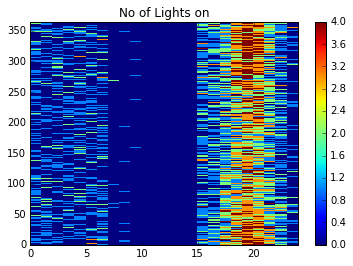

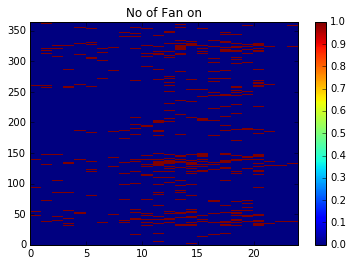

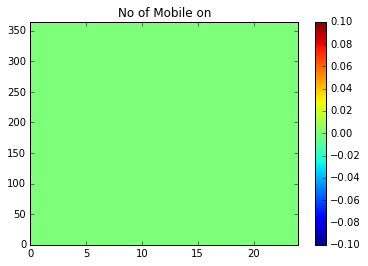

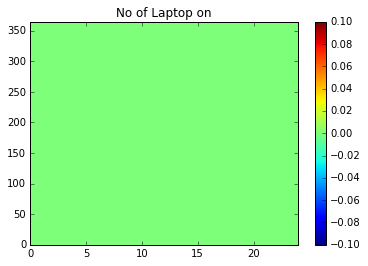

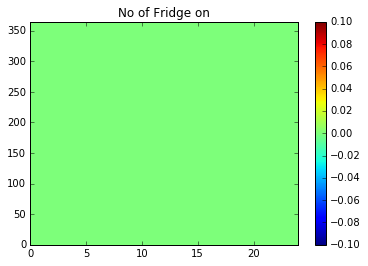

In [53]:
plt.figure(1)
plt.pcolor(dfLights)
plt.title('No of Lights on')
plt.colorbar()

plt.figure(2)
plt.pcolor(dfFan)
plt.title('No of Fan on')
plt.colorbar()

plt.figure(3)
plt.pcolor(dfMobile)
plt.title('No of Mobile on')
plt.colorbar()

plt.figure(4)
plt.pcolor(dfLaptop)
plt.title('No of Laptop on')
plt.colorbar()

plt.figure(5)
plt.pcolor(dfFridge)
plt.title('No of Fridge on')
plt.colorbar()
